In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime
import seaborn as sns

In [2]:
#pip install scikit-learn
#pip install cleanlab
# Make sure to install the version corresponding to this tutorial
# E.g. if viewing master branch documentation:
#     !pip install git+https://github.com/cleanlab/cleanlab.git
import pandas as pd
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import r2_score

from cleanlab.regression.learn import CleanLearning

PyTorch version 1.13.1 available.
TensorFlow version 2.13.0 available.


In [3]:
# load dataset
df = pd.read_csv('df_p.csv', header=0, index_col=0)
df.describe()

,AQI,PM2.5,PM10,O3,CO,SO2,NO2,TruAQI,notes
count,10610.000000,10610.000000,10610.000000,10610.000000,10610.000000,10610.000000,10610.000000,10610.000000,0.0
mean,166.254477,132.188108,139.443644,37.247923,106.643639,13.186552,31.811470,166.254477,NaN
std,108.777329,129.681394,107.182628,32.845773,119.748285,9.876863,34.156054,108.777329,NaN
min,15.000000,4.000000,7.000000,1.000000,0.250000,2.000000,0.670000,15.000000,NaN
25%,91.000000,33.180000,61.000000,10.000000,3.000000,4.400000,6.000000,91.000000,NaN
50%,141.000000,67.060000,100.820000,26.000000,52.000000,10.000000,18.000000,141.000000,NaN
75%,230.000000,193.000000,198.000000,58.890000,204.000000,20.000000,47.000000,230.000000,NaN
max,450.000000,500.000000,480.000000,225.000000,410.000000,48.000000,119.000000,450.000000,NaN


In [4]:
# Note: This pulldown content is for docs.cleanlab.ai, if running on local Jupyter or Colab, please ignore it.

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def plot_data(df, errors_idx):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    x, y, z = df["PM2.5"], df["PM10"], df["O3"]
    labels = df["AQI"]

    img = ax.scatter(x, y, z, c=labels, cmap="jet")
    fig.colorbar(img)

    ax.plot(
        x.iloc[errors_idx],
        y.iloc[errors_idx],
        z.iloc[errors_idx],
        "x",
        markeredgecolor="black",
        markersize=10,
        markeredgewidth=2.5,
        alpha=0.8,
        label="Label Errors"
    )
    ax.legend()

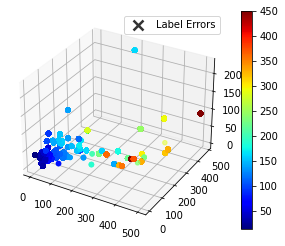

In [5]:
errors_mask = df["AQI"] != df["TruAQI"]
errors_idx = np.where(errors_mask == 1)

plot_data(df, errors_idx)

In [6]:
feature_columns = ["PM2.5", "PM10", "O3", "CO", "SO2", "NO2","notes"]			
predicted_column = "AQI"

X_train_raw, y_train = df[feature_columns], df[predicted_column]
X_test_raw, y_test = df[feature_columns], df[predicted_column]

In [7]:
categorical_features = ["notes"]
X_train = pd.get_dummies(X_train_raw, columns=categorical_features)
X_test = pd.get_dummies(X_test_raw, columns=categorical_features)

In [8]:
model = HistGradientBoostingRegressor()
cl = CleanLearning(model)

In [9]:
label_issues = cl.find_label_issues(X_train, y_train)

In [10]:
label_issues.head()

,is_label_issue,label_quality,given_label,predicted_label
0,False,0.998793,158,157.999433
1,False,0.993477,158,157.996930
2,False,0.999155,158,157.999605
3,False,0.999158,158,157.999605
4,False,0.999586,158,157.999806


In [11]:
given_label=label_issues['given_label']
predicted_label=label_issues['predicted_label']

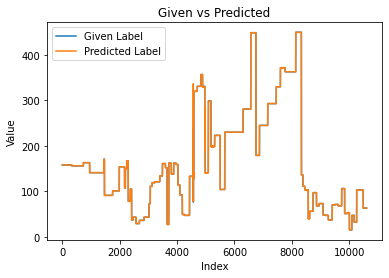

In [12]:
plt.plot(given_label, label='Given Label')
plt.plot(predicted_label, label='Predicted Label')

# set the x-axis label
plt.xlabel('Index')

# set the y-axis label
plt.ylabel('Value')

# set the plot title
plt.title('Given vs Predicted')

# Adding a legend
plt.legend()

# display the plot
plt.show()

In [13]:
identified_issues = label_issues[label_issues["is_label_issue"] == True]
lowest_quality_labels = label_issues["label_quality"].argsort()[:10].to_numpy()

In [14]:
print(
    f"cleanlab found {len(identified_issues)} potential label errors in the dataset.\n"
    f"Here are indices of the top 10 most likely errors: \n {lowest_quality_labels}"
)

cleanlab found 0 potential label errors in the dataset.
Here are indices of the top 10 most likely errors: 
 [4566 4976 4977 4974 4975 4973 4972 4583 1465 1468]


In [15]:
def view_datapoint(index):
    given_labels = label_issues["given_label"]
    predicted_labels = label_issues["predicted_label"].round(1)
    return pd.concat(
        [X_train_raw, given_labels, predicted_labels], axis=1
    ).iloc[index]

In [16]:
view_datapoint(lowest_quality_labels[:5])


,PM2.5,PM10,O3,CO,SO2,NO2,notes,given_label,predicted_label
6305,347.0,233.0,2.0,149.0,12.0,62.0,NaN,281.0,281.0
6730,350.0,281.0,2.0,122.0,17.0,61.0,NaN,449.0,449.0
6731,350.0,281.0,2.0,122.0,17.0,61.0,NaN,449.0,449.0
6728,350.0,281.0,2.0,122.0,17.0,61.0,NaN,449.0,449.0
6729,350.0,281.0,2.0,122.0,17.0,61.0,NaN,449.0,449.0


In [17]:
given_label=label_issues['given_label']
predicted_label=label_issues['predicted_label']

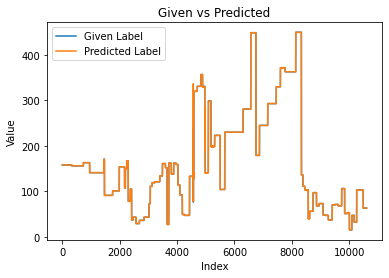

In [18]:
plt.plot(given_label, label='Given Label')
plt.plot(predicted_label, label='Predicted Label')

# set the x-axis label
plt.xlabel('Index')

# set the y-axis label
plt.ylabel('Value')

# set the plot title
plt.title('Given vs Predicted')

# Adding a legend
plt.legend()

# display the plot
plt.show()

In [19]:
baseline_model = HistGradientBoostingRegressor()
baseline_model.fit(X_train, y_train)

preds_og = baseline_model.predict(X_test)
r2_og = r2_score(y_test, preds_og)
print(f"r-squared score of original model: {r2_og:.3f}")

r-squared score of original model: 1.000


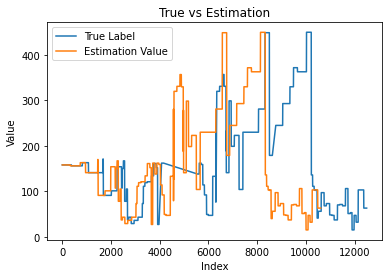

In [20]:
plt.plot(y_test, label='True Label')
plt.plot(preds_og, label='Estimation Value')

# set the x-axis label
plt.xlabel('Index')

# set the y-axis label
plt.ylabel('Value')

# set the plot title
plt.title('True vs Estimation')

# Adding a legend
plt.legend()

# display the plot
plt.show()

In [21]:
found_label_issues = cl.get_label_issues()
cl.fit(X_train, y_train, label_issues=found_label_issues)

preds_cl = cl.predict(X_test)
r2_cl = r2_score(y_test, preds_cl)
print(f"r-squared score of cleanlab's model: {r2_cl:.3f}")

r-squared score of cleanlab's model: 1.000


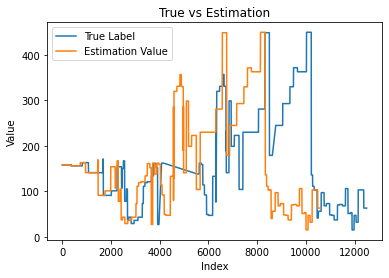

In [22]:
plt.plot(y_test, label='True Label')
plt.plot(preds_cl, label='Estimation Value')

# set the x-axis label
plt.xlabel('Index')

# set the y-axis label
plt.ylabel('Value')

# set the plot title
plt.title('True vs Estimation')

# Adding a legend
plt.legend()

# display the plot
plt.show()

In [23]:
import sys

from typing import Dict, Optional, Tuple
from pathlib import Path

import math

import tensorflow as tf
from tensorflow import keras

import seaborn as sns
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn import preprocessing
from sklearn.model_selection import train_test_split

from tensorflow.keras import backend #Keras version 2.1.6
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Concatenate, LeakyReLU, Input, Conv2D, MaxPooling2D 

from tensorflow.keras import layers

from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.preprocessing import image
#from PIL import Image

from sklearn.metrics import r2_score
from sklearn.utils import shuffle

%matplotlib inline

In [24]:
# load dataset
df = pd.read_csv('df_poll.csv', header=0, index_col=0)
df.describe()

,AQI,PM2.5,PM10,O3,CO,SO2,NO2
count,10610.000000,10610.000000,10610.000000,10610.000000,10610.000000,10610.000000,10610.000000
mean,166.254477,132.188108,139.443644,37.247923,106.643639,13.186552,31.811470
std,108.777329,129.681394,107.182628,32.845773,119.748285,9.876863,34.156054
min,15.000000,4.000000,7.000000,1.000000,0.250000,2.000000,0.670000
25%,91.000000,33.180000,61.000000,10.000000,3.000000,4.400000,6.000000
50%,141.000000,67.060000,100.820000,26.000000,52.000000,10.000000,18.000000
75%,230.000000,193.000000,198.000000,58.890000,204.000000,20.000000,47.000000
max,450.000000,500.000000,480.000000,225.000000,410.000000,48.000000,119.000000


In [25]:
dataset_columns = df.columns.tolist()
dataset_columns

['AQI', 'PM2.5', 'PM10', 'O3', 'CO', 'SO2', 'NO2']

<Axes: >

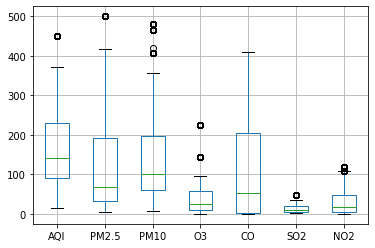

In [26]:
#Box plot
#pd.options.display.mpl_style = False
df.boxplot()

In [27]:
df

,AQI,PM2.5,PM10,O3,CO,SO2,NO2
0,158,70.08,100.82,58.89,0.49,4.4,1.04
1,158,70.08,100.82,58.89,0.49,4.4,1.04
2,158,70.08,100.82,58.89,0.49,4.4,1.04
4,158,70.08,100.82,58.89,0.49,4.4,1.04
5,158,70.08,100.82,58.89,0.49,4.4,1.04
...,...,...,...,...,...,...,...
12495,63,31.00,52.00,10.00,6.00,4.0,2.00
12496,63,31.00,52.00,10.00,6.00,4.0,2.00
12497,63,31.00,52.00,10.00,6.00,4.0,2.00
12498,63,31.00,52.00,10.00,6.00,4.0,2.00


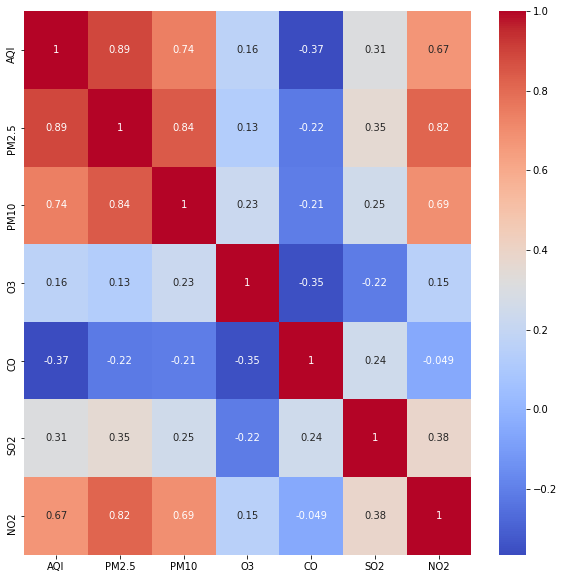

In [28]:
#plotting the coorelation heatmap
dataset = df [['AQI','PM2.5','PM10','O3','CO','SO2','NO2']]
plt.figure(figsize=(10,10))
sns.heatmap(dataset.corr(),annot=True,cmap='coolwarm')
plt.show()

<ipython-input-29-3cab055ed78a>:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


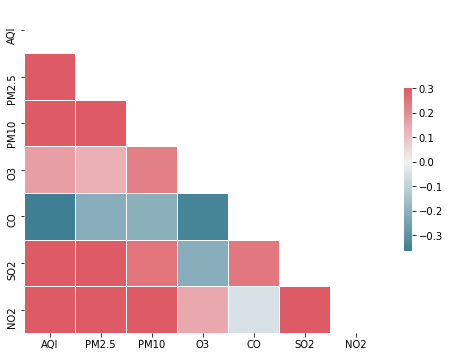

In [29]:
corr = df.corr()

# plot the heatmap
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(8, 6))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=False, linewidths=.5, cbar_kws={"shrink": .5});

Text(0.5, 1.0, 'pollution')

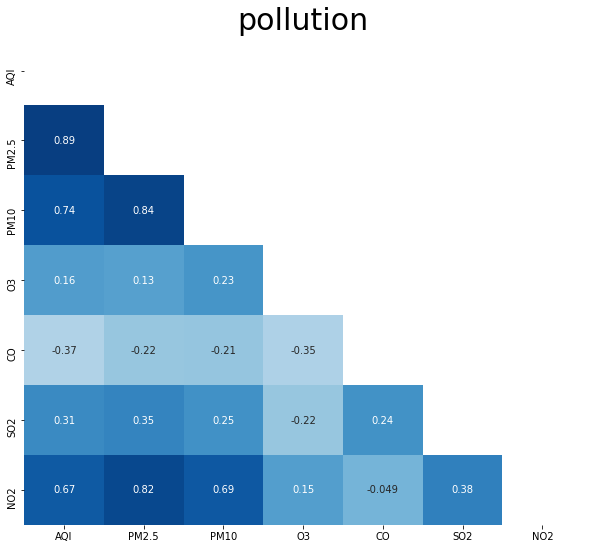

In [30]:
#matrica korelacije
plt.figure(figsize= (10,9))
corr = df.corr()
matrix = np.triu(corr)
heatmap = sns.heatmap(corr, vmin = -1, vmax = 1, annot = True, cmap = 'Blues',cbar=False, mask = matrix)
heatmap.set_title('pollution', fontdict = {'fontsize':30})

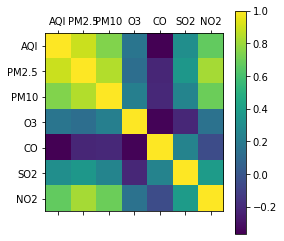

In [31]:
#Analysing relationship between different features
# cor_cols = ['pollution', 'wnd_spd', 'rain', 'snow', 'temp']
cor_cols = dataset_columns
plt.matshow(df.corr())
plt.xticks(range(len(cor_cols)), cor_cols)
plt.yticks(range(len(cor_cols)), cor_cols)
plt.colorbar()
plt.show()

In [32]:
from sklearn.preprocessing import LabelEncoder

# Encode non categorical values
values = df.values
encoder = LabelEncoder()
values[:,5] = encoder.fit_transform(values[:,5])
values = values.astype('float32')
values[:,5]

array([12., 12., 12., ...,  9.,  9.,  9.], dtype=float32)

In [33]:
#Normalising data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_dataset = scaler.fit_transform(values)

In [34]:
#Creating a window for previous data
def to_supervised(train):
  window_size = 5
  X = []
  Y = []
  for i in range(window_size, len(train)):
    X.append(train[i-window_size:i,:])
    Y.append(train[i,0:1])
    
  return X,Y

In [35]:
X, Y = to_supervised(scaled_dataset)
X = np.array(X)
Y = np.array(Y)
print('Y' ,Y.shape)
print('X' ,X.shape)


Y (10605, 1)
X (10605, 5, 7)


In [36]:
#Splitting the dataset
n_train = 75*70
X_train, X_test = X[n_train:,] , X[:n_train,]
print('X_train' ,X_train.shape)
print('X_test' ,X_test.shape)

Y_train, Y_test = Y[n_train:,] , Y[:n_train,]
print('Y_train' ,Y_train.shape)
print('Y_test' ,Y_test.shape)

X_train (5355, 5, 7)
X_test (5250, 5, 7)
Y_train (5355, 1)
Y_test (5250, 1)


In [40]:
#Importing LSTM model
from keras.models import Sequential
from keras.layers import Dense, Dropout,LSTM
model = Sequential()
model.add(LSTM(units = 50, return_sequences = True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))

model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units = 50))
model.add(Dropout(0.2))

model.add(Dense(units = 1))

model.compile(optimizer = 'adam', loss = 'mean_squared_error')         

In [41]:
#Train the model
model.fit(X_train, Y_train, epochs = 20, batch_size = 32)

Epoch 1/20
168/168 [==============================] - 31s 31ms/step - loss: 0.0229
Epoch 2/20
168/168 [==============================] - 4s 27ms/step - loss: 0.0042
Epoch 3/20
168/168 [==============================] - 4s 25ms/step - loss: 0.0032
Epoch 4/20
168/168 [==============================] - 4s 24ms/step - loss: 0.0030
Epoch 5/20
168/168 [==============================] - 4s 24ms/step - loss: 0.0029
Epoch 6/20
168/168 [==============================] - 4s 22ms/step - loss: 0.0026
Epoch 7/20
168/168 [==============================] - 4s 21ms/step - loss: 0.0025
Epoch 8/20
168/168 [==============================] - 4s 24ms/step - loss: 0.0025
Epoch 9/20
168/168 [==============================] - 4s 24ms/step - loss: 0.0023
Epoch 10/20
168/168 [==============================] - 4s 24ms/step - loss: 0.0023
Epoch 11/20
168/168 [==============================] - 4s 25ms/step - loss: 0.0022
Epoch 12/20
168/168 [==============================] - 4s 25ms/step - loss: 0.0021
Epoch 13/20


In [42]:
#Taking predictions
from keras.models import load_model
model.save('AirPollutionMultivariate.h5')

c:\Users\QEC\Anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [43]:
Y_pred = model.predict(X_test)

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Y_test, Y_pred)
rmse = np.sqrt(mse)
rmse

165/165 [==============================] - 6s 9ms/step


0.023637312

In [56]:
r2_m = r2_score(Y_test, Y_pred)
#print(f"r-squared score of original model: {r2_m:.3f}")
r2_m

0.9805259154853466

In [47]:
#Y_predicted = scaler.inverse_transform(Y_pred)
print('y_predicted',Y_pred.shape)
#print('X_train' ,X_train.shape)
print('X_test' ,X_test.shape)
print('scaled Values shape', scaled_dataset.shape)

y_predicted (5250, 1)
X_test (5250, 5, 7)
scaled Values shape (10610, 7)


In [48]:
#Scaling back to the original scale
d = scaled_dataset[:5250,:]
print('dummy',d.shape)
print('Y_pred',Y_pred.shape)
Y_predicted = np.concatenate((Y_pred,d[:5250,1:]), axis =1)
print('concat y_pred',Y_pred.shape)
Y_tested = np.concatenate((Y_test, d[:5250,1:]), axis = 1)
print('concat Y_test', Y_test.shape)

dummy (5250, 7)
Y_pred (5250, 1)
concat y_pred (5250, 1)
concat Y_test (5250, 1)


In [49]:
Y_predicted = scaler.inverse_transform(Y_predicted)
Y_tested = scaler.inverse_transform(Y_tested)
Y_predicted = Y_predicted[:,0:1]
Y_tested = Y_tested[:,0:1]
print('Y_tested', Y_tested.shape)
print('Y_predicted', Y_predicted.shape)

Y_tested (5250, 1)
Y_predicted (5250, 1)


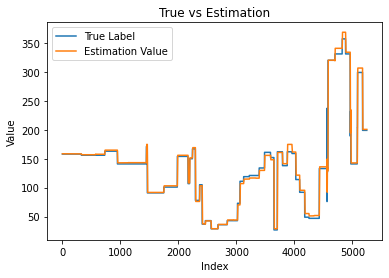

In [50]:
plt.plot(Y_tested, label='True Label')
plt.plot(Y_predicted, label='Estimation Value')

# set the x-axis label
plt.xlabel('Index')

# set the y-axis label
plt.ylabel('Value')

# set the plot title
plt.title('True vs Estimation')

# Adding a legend
plt.legend()

# display the plot
plt.show()

In [51]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Y_tested, Y_predicted)

rmse = np.sqrt(mse)
rmse

10.282231

In [57]:
r2_p = r2_score(Y_tested, Y_predicted)
#print(f"r-squared score of original model: {r2_p:.3f}")
r2_p

0.9805259162317084

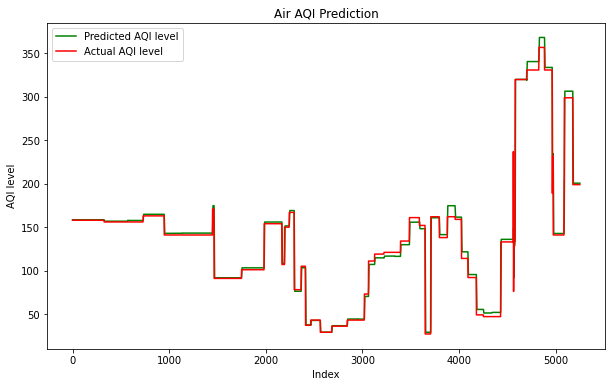

<Figure size 432x288 with 0 Axes>

In [55]:
#Plot the graph between actual vs predicted values
plt.figure(figsize=(10,6))  
plt.plot(Y_predicted, color= 'green',label = 'Predicted AQI level')
plt.plot(Y_tested, color = 'red',label = 'Actual AQI level')
plt.title("Air AQI Prediction")
plt.xlabel("Index")
plt.ylabel("AQI level")
plt.legend()
plt.show()
plt.savefig('graph.png')

In [53]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(Y_tested, Y_predicted)
print('MAPE', mape)


MAPE 3.5502638667821884


In [54]:
plr = LinearRegression()
#model training
plr.fit(x_train,y_train)
#model accuracy
plr.score(x_train,y_train)

NameError: name 'LinearRegression' is not defined

In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Y_tested, Y_predicted)
#print('Mean squared error', mse)
print('RMSE' , np.sqrt(mse))
print("Mean of Test data ", np.mean(Y_tested))

RMSE 9.804111
Mean of Test data  136.92247


In [ ]:
model = HistGradientBoostingRegressor()
cl = CleanLearning(model)

In [ ]:
label_issues = cl.find_label_issues(X_train, Y_train)

ValueError: Found array with dim 3. HistGradientBoostingRegressor expected <= 2.

In [ ]:
import pandas as pd
import matplotlib 
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import statsmodels.api as sm 

import numpy as np
import missingno as msno
from google.colab import files
from sklearn.preprocessing import StandardScaler, PolynomialFeatures,normalize
from sklearn.model_selection import StratifiedKFold,train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score,recall_score, f1_score, ConfusionMatrixDisplay,confusion_matrix, accuracy_score, precision_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from scipy.stats import skew,kurtosis
from datetime import datetime

ModuleNotFoundError: No module named 'google.colab'

In [ ]:
import statsmodels.api as sm 
#prag od 0.01,
X = sm.add_constant(X_train)
model = sm.OLS(Y_train, X.astype(float)).fit()
model.summary()

ValueError: Only implemented for 2-dimensional arrays